# Homework01 - Rui Pinto

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Download Data

In [2]:
#Download the data for January and February 2023.

#!curl https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet > data/yellow_tripdata_2023-01.parquet
#!curl https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet > data/yellow_tripdata_2023-02.parquet

## Q1 - Downloading the data

Read the data for January. How many columns are there?

- 16
- 17
- 18
- 19 ✔

In [3]:
# reading data
yellow_tripdata_2023_01 = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine='pyarrow')

In [4]:
print(f"yellow_tripdata_2023_01 has {yellow_tripdata_2023_01.shape[1]} columns")

yellow_tripdata_2023_01 has 19 columns


## Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

- 32.59
- 42.59 ✔
- 52.59
- 62.59

In [5]:
yellow_tripdata_2023_01['Duration'] = (yellow_tripdata_2023_01['tpep_dropoff_datetime'] - yellow_tripdata_2023_01['tpep_pickup_datetime']).dt.total_seconds() / 60

In [6]:
# standard deviation of duration
yellow_tripdata_2023_01['Duration'].std()

np.float64(42.59435124195458)

## Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

- 90%
- 92%
- 95%
- 98% ✔

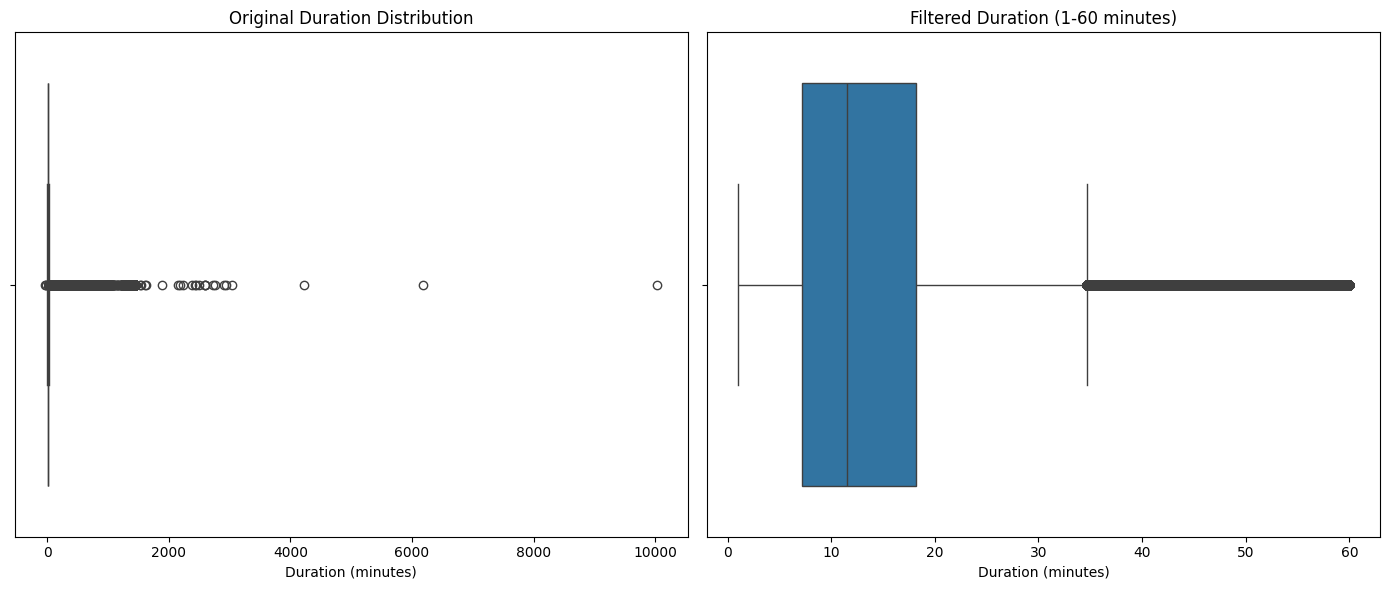

Fraction of records left after removing outliers: 0.9812


In [7]:
import matplotlib.pyplot as plt

filtered_df = yellow_tripdata_2023_01[(yellow_tripdata_2023_01['Duration'] >= 1) & 
                                     (yellow_tripdata_2023_01['Duration'] <= 60)]


# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot original distribution
sns.boxplot(x=yellow_tripdata_2023_01['Duration'], ax=ax1)
ax1.set_title('Original Duration Distribution')
ax1.set_xlabel('Duration (minutes)')

# Plot filtered distribution
sns.boxplot(x=filtered_df['Duration'], ax=ax2)
ax2.set_title('Filtered Duration (1-60 minutes)')
ax2.set_xlabel('Duration (minutes)')

plt.tight_layout()
plt.show()

# Calculate the fraction of records left after filtering
original_count = len(yellow_tripdata_2023_01)
filtered_count = len(filtered_df)

fraction = filtered_count / original_count
print(f"Fraction of records left after removing outliers: {fraction:.4f}")

## Q4. One-hot encoding

Let's apply one-hot encoding to the **pickup and dropoff location IDs**. We'll use only these two features for our model.

- Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
- Fit a dictionary vectorizer
- Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

- 2
- 155
- 345
- 515 ✔
- 715

In [8]:
filtered_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [9]:
filtered_df[['PULocationID','DOLocationID']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 2 columns):
 #   Column        Dtype
---  ------        -----
 0   PULocationID  int64
 1   DOLocationID  int64
dtypes: int64(2)
memory usage: 68.9 MB


In [10]:
# selecting features
selected_features = ['PULocationID','DOLocationID']

# Turn the dataframe into a list of dictionaries with string-cast ids
filtered_df = filtered_df.copy()  # Create a copy to avoid SettingWithCopyWarning
filtered_df['PULocationID'] = filtered_df['PULocationID'].astype(str)
filtered_df['DOLocationID'] = filtered_df['DOLocationID'].astype(str)
tripdata_2023_01_dict = filtered_df[selected_features].to_dict(orient='records')

tripdata_2023_01_dict[:5]

[{'PULocationID': '161', 'DOLocationID': '141'},
 {'PULocationID': '43', 'DOLocationID': '237'},
 {'PULocationID': '48', 'DOLocationID': '238'},
 {'PULocationID': '138', 'DOLocationID': '7'},
 {'PULocationID': '107', 'DOLocationID': '79'}]

In [11]:
# fit a dictionary vectorizer
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
dv.fit_transform(tripdata_2023_01_dict)

print(f"The number of features is {len(dv.feature_names_)}")

The number of features is 515


## Q5. Training a model
Now let's use the feature matrix from the previous step to train a model.

- Train a plain linear regression model with default parameters, where duration is the response variable
- Calculate the RMSE of the model on the training data

What's the RMSE on train?

- 3.64
- 7.64 ✔
- 11.64
- 16.64

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train = dv.fit_transform(tripdata_2023_01_dict)
y_train = filtered_df['Duration'].values

lr = LinearRegression().fit(X_train,y_train)

# prediction on train
y_pred = lr.predict(X_train)
rmse = root_mean_squared_error(y_train, y_pred)
print(f"RMSE on train data: {rmse:.2f} minutes")

RMSE on train data: 7.65 minutes


## Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

- 3.81
- 7.81 ✔
- 11.81
- 16.81

In [13]:
def process_trip_data(df):
    # Calculate duration in minutes
    df['Duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
    
    # Filter trips between 1-60 minutes
    filtered = df[(df['Duration'] >= 1) & (df['Duration'] <= 60)].copy()
    
    # Convert location IDs to strings
    filtered['PULocationID'] = filtered['PULocationID'].astype(str)
    filtered['DOLocationID'] = filtered['DOLocationID'].astype(str)
    
    # Return the filtered dataframe to access both features and target
    return filtered

# Process February data
yellow_tripdata_2023_02 = pd.read_parquet('data/yellow_tripdata_2023-02.parquet', engine='pyarrow')
filtered_df_feb = process_trip_data(yellow_tripdata_2023_02)

# Create feature dictionaries for DictVectorizer
val_dicts = filtered_df_feb[['PULocationID', 'DOLocationID']].to_dict(orient='records')

# Transform features and prepare target
X_val = dv.transform(val_dicts)
y_val = filtered_df_feb['Duration'].values

In [14]:
y_pred_val = lr.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val)
print(f"RMSE on validation data: {rmse_val:.2f} minutes")

RMSE on validation data: 7.81 minutes
